# Logistic regression
1. Logit model
2. Ordinal logit model
3. Multinomial logit model

## Slides plots

In [7]:
library(ISLR)

Default

default student balance   income   
1     No      No       729.5265 44361.625
2     No      Yes      817.1804 12106.135
3     No      No      1073.5492 31767.139
4     No      No       529.2506 35704.494
5     No      No       785.6559 38463.496
6     No      Yes      919.5885  7491.559
7     No      No       825.5133 24905.227
8     No      Yes      808.6675 17600.451
9     No      No      1161.0579 37468.529
10    No      No         0.0000 29275.268
11    No      Yes        0.0000 21871.073
12    No      Yes     1220.5838 13268.562
13    No      No       237.0451 28251.695
14    No      No       606.7423 44994.556
15    No      No      1112.9684 23810.174
16    No      No       286.2326 45042.413
17    No      No         0.0000 50265.312
18    No      Yes      527.5402 17636.540
19    No      No       485.9369 61566.106
20    No      No      1095.0727 26464.631
21    No      No       228.9525 50500.182
22    No      No       954.2618 32457.509
23    No      No      1055.9566 51317.883
24    No      No       641.9844 30466.103
25    No      No       773.2117 34353.314
26    No      No       855.0085 25211.332
27    No      No       642.9997 41473.512
28    No      No      1454.8633 32189.095
29    No      No       615.7043 39376.395
30    No      Yes     1119.5694 16556.070
⋮     ⋮       ⋮       ⋮         ⋮        
9971  No      Yes     1294.5004 25687.33 
9972  No      Yes      180.6201 20975.56 
9973  No      No       755.4328 14455.87 
9974  No      No       876.1190 37668.37 
9975  No      Yes      933.3320 26051.40 
9976  No      No       908.3159 21287.94 
9977  No      No       218.4176 25401.13 
9978  No      Yes      915.4398 16624.34 
9979  Yes     No      2202.4624 47287.26 
9980  No      No       173.2492 30697.25 
9981  No      Yes      770.0157 13684.79 
9982  No      No       739.4180 40656.95 
9983  No      No       623.5261 59441.31 
9984  No      No       506.6255 49861.00 
9985  No      No       875.2416 52861.74 
9986  No      No       842.9494 39957.13 
9987  No      Yes      401.3327 15332.02 
9988  No      No      1092.9066 45479.47 
9989  No      No         0.0000 41740.69 
9990  No      Yes      999.2811 20013.35 
9991  No      No       372.3792 25374.90 
9992  No      No       658.7996 54802.08 
9993  No      No      1111.6473 45490.68 
9994  No      No       938.8362 56633.45 
9995  No      Yes      172.4130 14955.94 
9996  No      No       711.5550 52992.38 
9997  No      No       757.9629 19660.72 
9998  No      No       845.4120 58636.16 
9999  No      No      1569.0091 36669.11 
10000 No      Yes      200.9222 16862.95

In [11]:
library(ggplot2)

ggplot(aes(x=balance, y=income, color=default), data=Default) + geom_point()
ggsave("scatter.png")

Saving 7 x 7 in image



Saving 7 x 7 in image



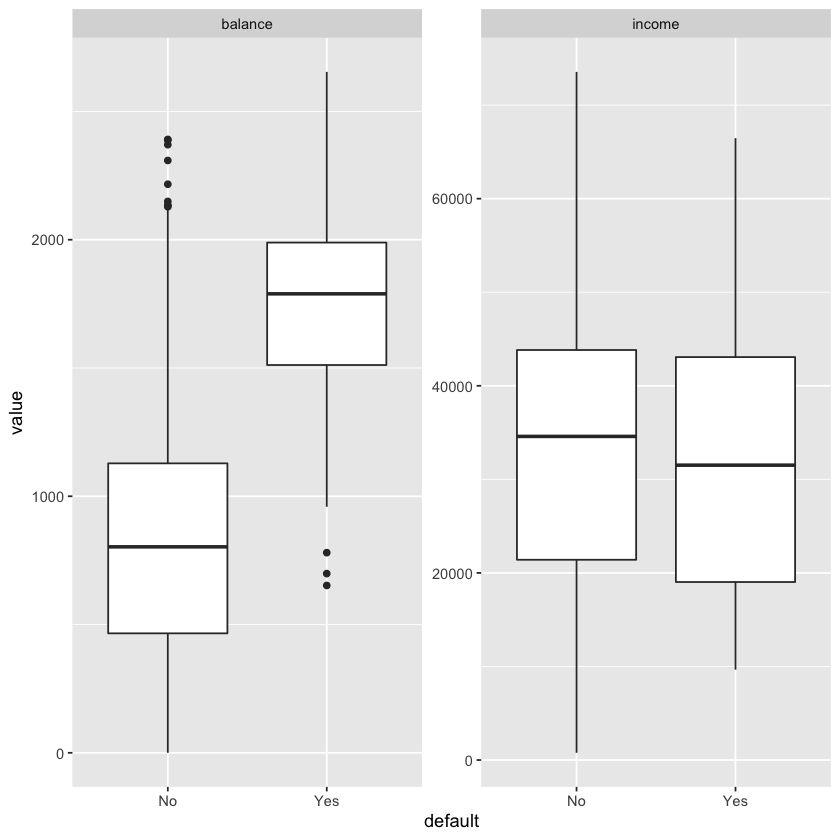

In [34]:
library(tidyverse)

data <- Default %>% pivot_longer(c("balance", "income"))
ggplot(aes(x=default, y=value), data=data) + geom_boxplot() + facet_wrap(~name, scales="free")
ggsave("boxplots.png")

In [40]:
ggplot(aes(x=balance, y=income, color=default), data=Default) + geom_point() + facet_wrap(~student) + labs(title="By student")
ggsave("bystudent.png")

Saving 7 x 7 in image



Saving 7 x 7 in image



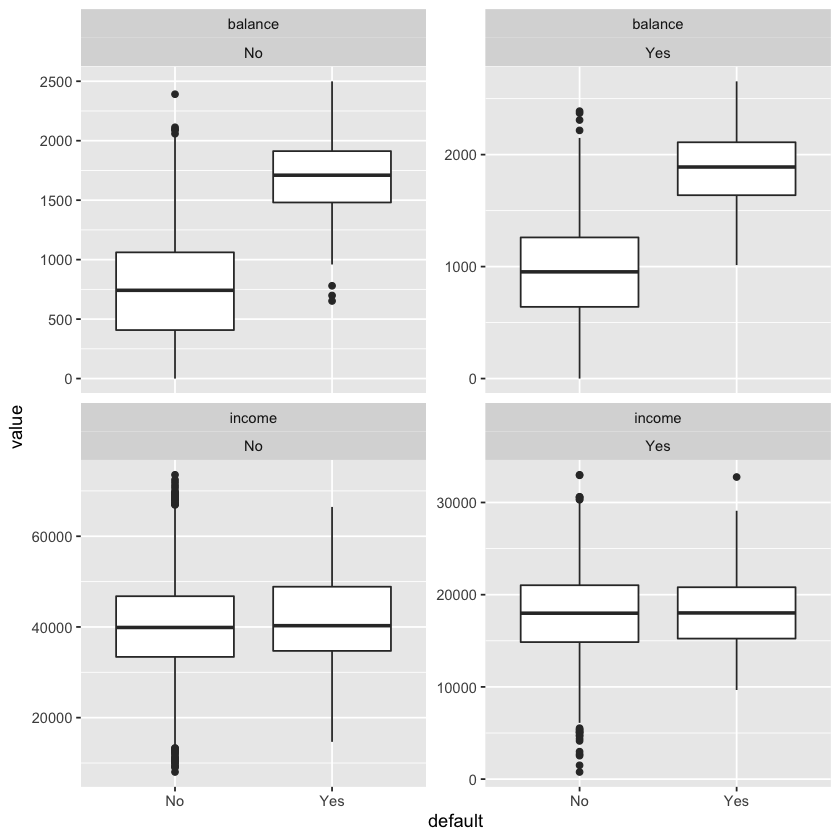

In [44]:
ggplot(aes(x=default, y=value), data=data) + geom_boxplot() + facet_wrap(~name+student, scales="free_y")
ggsave("income_balance_by_student.png")

In [60]:
as.numeric(Default$default)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  [181] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [469] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [505] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [541] 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [577] 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [613] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  [649] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [685] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  [721] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [757] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [793] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [829] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [865] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [901] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
  [937] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [973] 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1441] 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1477] 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 [1513] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1549] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1585] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 [1621] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1657] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1693] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1729] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1765] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

In [112]:
# Wroooooonnnnng
model <- lm(default~balance, data = Default %>% mutate(default=as.numeric(default)-1))
model


Call:
lm(formula = default ~ balance, data = Default %>% mutate(default = as.numeric(default) - 
    1))

Coefficients:
(Intercept)      balance  
 -0.0751920    0.0001299  


Saving 7 x 7 in image



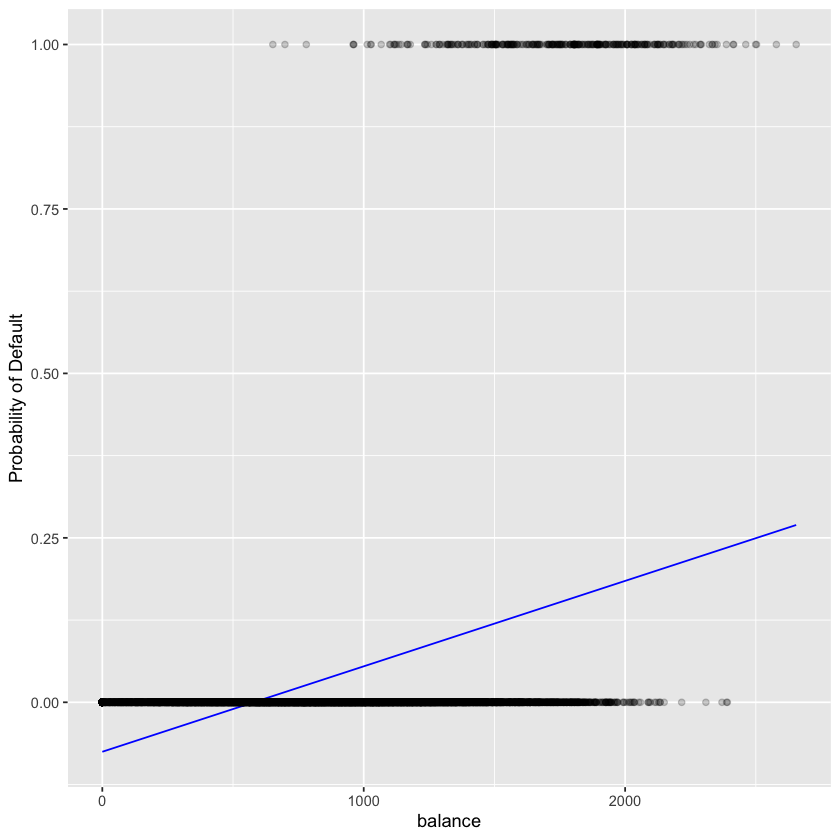

In [113]:
library(caret)

data <- Default %>% 
    select(balance) %>% 
    mutate(pred = as.numeric(predict(model, Default, type = "response")))

ggplot(aes(x=balance, y=pred), data = data) + geom_line(color="blue") + 
    geom_point(aes(y=as.numeric(default)-1), data=Default, alpha = 0.2) + labs(y="Probability of Default")
ggsave("lm.png")

In [114]:
# Gooooood
model <- glm(default~balance, family=binomial, data = Default)
model


Call:  glm(formula = default ~ balance, family = binomial, data = Default)

Coefficients:
(Intercept)      balance  
 -10.651331     0.005499  

Degrees of Freedom: 9999 Total (i.e. Null);  9998 Residual
Null Deviance:	    2921 
Residual Deviance: 1596 	AIC: 1600

In [115]:
data <- Default %>% 
    select(balance) %>% 
    mutate(pred = as.numeric(predict(model, Default, type = "response")))

ggplot(aes(x=balance, y=pred), data = data) + geom_line(color="blue") + 
    geom_point(aes(y=as.numeric(default)-1), data=Default, alpha = 0.2) + labs(y="Probability of Default")
ggsave("glm.png")

Saving 7 x 7 in image



In [132]:
model <- glm(default~balance, family=binomial, data = Default)
summary(model)

cfm <- table(Default$default, ifelse(as.numeric(predict(model, Default))>0.5,"Yes","No"))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


     
        No  Yes
  No  9647   20
  Yes  262   71

[1] 0.9718

In [147]:
model <- glm(default~student, family=binomial, data = Default)
summary(model)

cfm <- matrix(rep(0,4), nrow=2)
cfm[,1] <- table(Default$default, ifelse(as.numeric(predict(model, Default))>0.5,"Yes","No"))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))


Call:
glm(formula = default ~ student, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
studentYes   0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


[,1] [,2]
[1,] 9667 0   
[2,]  333 0

[1] 0.9667

In [148]:
model <- glm(default~., family=binomial, data = Default)
summary(model)

cfm <- table(Default$default, ifelse(as.numeric(predict(model, Default))>0.5,"Yes","No"))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))


Call:
glm(formula = default ~ ., family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


     
        No  Yes
  No  9645   22
  Yes  254   79

[1] 0.9724

## Logit model

Panel data (also known as longitudinal or cross-sectional time-series data) is a dataset in which the behavior of entities are observed across time. These entities could be states, companies, individuals, countries, etc.

In [150]:
# Getting sample data
library(foreign)

mydata <- read.dta("https://dss.princeton.edu/training/Panel101.dta")
mydata

country year y           y_bin x1          x2         x3          opinion  
1  A       1990  1342787840 1      0.27790365 -1.1079559  0.28255358 Str agree
2  A       1991 -1899660544 0      0.32068470 -0.9487200  0.49253848 Disag    
3  A       1992   -11234363 0      0.36346573 -0.7894840  0.70252335 Disag    
4  A       1993  2645775360 1      0.24614404 -0.8855330 -0.09439092 Disag    
5  A       1994  3008334848 1      0.42462304 -0.7297683  0.94613063 Disag    
6  A       1995  3229574144 1      0.47721413 -0.7232460  1.02968037 Str agree
7  A       1996  2756754176 1      0.49980500 -0.7815716  1.09228814 Disag    
8  A       1997  2771810560 1      0.05162839 -0.7048455  1.41590083 Str agree
9  A       1998  3397338880 1      0.36641079 -0.6983712  1.54872274 Disag    
10 A       1999    39770336 1      0.39584252 -0.6431540  1.79419804 Str disag
11 B       1990 -5934699520 0     -0.08184998  1.4251202  0.02342812 Agree    
12 B       1991  -711623744 0      0.10616001  1.6496018  0.26036251 Str agree
13 B       1992 -1933116160 0      0.35378519  1.5937191 -0.23439877 Agree    
14 B       1993  3072741632 1      0.72677696  1.6917576  0.25622433 Str disag
15 B       1994  3768078848 1      0.71939486  1.7414261  0.41174951 Disag    
16 B       1995  2837581312 1      0.67154658  1.7083139  0.53584301 Str disag
17 B       1996   577199360 1      0.81985730  1.5324961 -0.49964902 Str agree
18 B       1997  1786851584 1      0.88016719  1.5021962 -0.57626772 Disag    
19 B       1998  -149072048 0      0.70451611  1.4236463 -0.44841924 Agree    
20 B       1999 -1174480128 0      0.23696731  1.4545859 -0.04936399 Str disag
21 C       1990 -1292379264 0      1.31256068 -1.2931356  0.20408297 Agree    
22 C       1991 -3415966464 0      1.17748356 -1.3442180  0.28397188 Str agree
23 C       1992  -355804672 0      1.25640798 -1.2599510  0.37339270 Agree    
24 C       1993  1225180032 1      1.42154455 -1.3117452 -0.37596563 Disag    
25 C       1994  3802287616 1      1.11419308 -1.2849948  0.56046754 Str disag
26 C       1995  1959696640 1      1.15948391 -1.2188276  0.69540799 Agree    
27 C       1996   530576672 1      1.16045427 -1.2350063  0.81689382 Agree    
28 C       1997  3128852224 1      1.44641161 -1.3275964 -0.14206907 Str disag
29 C       1998  3201045760 1      1.15162671 -1.2061129  1.19458139 Str agree
30 C       1999  4663067648 1      1.19054413 -1.1266172  1.67016041 Disag    
⋮  ⋮       ⋮    ⋮           ⋮     ⋮           ⋮          ⋮           ⋮        
41 E       1990  1342787840 1      0.4528672   1.7284026  0.59705788 Str disag
42 E       1991  2296009472 1      0.4190403   1.7068400  0.79313534 Str agree
43 E       1992  1737627776 1      0.3852135   1.6852775  0.98921281 Agree    
44 E       1993   113973136 1     -0.2442877   1.6492835  1.22413278 Str agree
45 E       1994   260098048 1      1.3911400   2.5302765 -0.52620137 Str disag
46 E       1995 -7863482880 0      0.3196856   1.1890552 -0.48425370 Agree    
47 E       1996  3520491520 1      0.6109768   1.4845277 -0.97895509 Agree    
48 E       1997  5234565120 1      0.7176149   1.5544620 -0.98863661 Str disag
49 E       1998   344746176 1      0.6961383   1.7010406 -0.08965246 Disag    
50 E       1999   243920688 1      0.6066207   1.6119040 -0.08929884 Str disag
51 F       1990  1342787840 1     -0.5675749  -0.3466710  1.25841928 Str agree
52 F       1991  3560401920 1      0.1597458  -0.4641182  0.32665297 Str disag
53 F       1992  3192281088 1      0.8870664  -0.5815655 -0.60511333 Agree    
54 F       1993  8941232128 1      0.5324180  -0.7553238 -0.51157588 Agree    
55 F       1994  8124504576 1      0.8726001  -0.7114431  0.20570269 Str agree
56 F       1995   491740096 1      0.9193523  -0.3697441 -0.01292755 Str agree
57 F       1996  3497164544 1      1.3968923  -0.3601406  0.67867643 Str agree
58 F       1997  4764803072 1      0.9868861  -0.3590902  0.24226174 Str agree
59 F       1998 -4671723520 0      0.7883091  -0.7556

In [152]:
# Running a logit model
logit <- glm(y_bin ~ x1 + x2 + x3, family=binomial, data=mydata)
summary(logit)

cfm <- table(mydata$y_bin, ifelse(as.numeric(predict(logit, mydata))>0.5,1,0))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))


Call:
glm(formula = y_bin ~ x1 + x2 + x3, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0277   0.2347   0.5542   0.7016   1.0839  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.4262     0.6390   0.667   0.5048  
x1            0.8618     0.7840   1.099   0.2717  
x2            0.3665     0.3082   1.189   0.2343  
x3            0.7512     0.4548   1.652   0.0986 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.056  on 69  degrees of freedom
Residual deviance: 65.512  on 66  degrees of freedom
AIC: 73.512

Number of Fisher Scoring iterations: 5


   
     0  1
  0  0 14
  1  4 52

[1] 0.7428571

In [153]:
logit <- glm(y_bin ~ x1 + x2 + x3 + opinion, family=binomial, data=mydata)
summary(logit)

cfm <- table(mydata$y_bin, ifelse(as.numeric(predict(logit, mydata))>0.5,1,0))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))


Call:
glm(formula = y_bin ~ x1 + x2 + x3 + opinion, family = binomial, 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1719   0.2264   0.3959   0.5641   1.5588  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.8816     0.8587   1.027   0.3046  
x1                 1.1336     0.9341   1.214   0.2249  
x2                 0.3021     0.3566   0.847   0.3969  
x3                 0.3976     0.4763   0.835   0.4038  
opinionAgree      -1.9164     0.9046  -2.118   0.0341 *
opinionDisag       0.3271     0.9984   0.328   0.7432  
opinionStr disag   0.6892     1.2494   0.552   0.5812  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.056  on 69  degrees of freedom
Residual deviance: 55.684  on 63  degrees of freedom
AIC: 69.684

Number of Fisher Scoring iterations: 5


   
     0  1
  0  8  6
  1  7 49

[1] 0.8142857

## Ordinal logit model

In [155]:
# Wroooooonggggg!!!!
logit <- glm(opinion ~ x1 + x2 + x3, family=binomial, data=mydata)
summary(logit)

cfm <- table(mydata$y_bin, ifelse(as.numeric(predict(logit, mydata))>0.5,1,0))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))


Call:
glm(formula = opinion ~ x1 + x2 + x3, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9219  -1.2671   0.7108   0.8343   1.1074  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.26731    0.52962   0.505    0.614
x1           1.05564    0.67990   1.553    0.121
x2           0.14162    0.25958   0.546    0.585
x3          -0.02317    0.22217  -0.104    0.917

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.758  on 69  degrees of freedom
Residual deviance: 81.206  on 66  degrees of freedom
AIC: 89.206

Number of Fisher Scoring iterations: 4


   
     0  1
  0  3 11
  1  8 48

[1] 0.7285714

In [156]:
library(MASS)

?polr


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [157]:
# Running the ordered logit model
m1 <- polr(opinion ~ x1 + x2 + x3, data=mydata, Hess=TRUE)
summary(m1)

cfm <- table(mydata$y_bin, ifelse(as.numeric(predict(logit, mydata))>0.5,1,0))
cfm

# Accuracy
(cfm[1,1] + cfm[2,2]) / (sum(cfm))

Call:
polr(formula = opinion ~ x1 + x2 + x3, data = mydata, Hess = TRUE)

Coefficients:
     Value Std. Error t value
x1 0.98140     0.5641  1.7397
x2 0.24936     0.2086  1.1954
x3 0.09089     0.1549  0.5867

Intercepts:
                Value   Std. Error t value
Str agree|Agree -0.2054  0.4682    -0.4388
Agree|Disag      0.7370  0.4697     1.5690
Disag|Str disag  1.9951  0.5204     3.8335

Residual Deviance: 189.6382 
AIC: 201.6382 

   
     0  1
  0  3 11
  1  8 48

[1] 0.7285714

### Simple version: t-value => p-value

![t-value](https://blog.minitab.com/hubfs/Imported_Blog_Media/ttest_formula_3.jpg "T-value")

One way to calculate a p-value is by comparing the t-value against the standard normal distribution, like a z-test.

To figure out the p-value for a particular t-value in a regression:

1. Take the absolute value of the t-value.
2. Find the upper tail probability, on a t-distribution, associated with that t-value.
3. Double it.

This is only true with infinite degrees of freedom, but is reasonably approximated by large samples, becoming increasingly biased as sample size decreases.

In [158]:
# Getting coefficients and p-values
m1.coef <- data.frame(coef(summary(m1)))
m1.coef$pval = round((pnorm(abs(m1.coef$t.value), lower.tail = FALSE) * 2),4)

m1.coef

Value       Std..Error t.value    pval  
x1               0.98139603 0.5641136   1.7397134 0.0819
x2               0.24935530 0.2086027   1.1953599 0.2319
x3               0.09089175 0.1549254   0.5866807 0.5574
Str agree|Agree -0.20542664 0.4682027  -0.4387558 0.6608
Agree|Disag      0.73696754 0.4696907   1.5690486 0.1166
Disag|Str disag  1.99507902 0.5204282   3.8335334 0.0001

### A more exact version: t-value => p-value
Remember, to figure out the p-value for a particular t-value:

1. Take the absolute value of the t-value.
2. Calculate the degrees of freedom as $N−K$ or the total number of observations in the model minus the total number of independent variables.
3. Find the upper tail probability, on a t-distribution with $N−K$ degrees of freedom, associated with that t-value.
4. Double it.

In [159]:
?pt

In [160]:
# Find the p-value for a t-value of 3.9418
pt(3.9418, dim(mydata)[1]-3, lower.tail=FALSE)*2

[1] 0.0001957254

In [161]:
# Getting coefficients and p-values
m1.coef <- data.frame(coef(summary(m1)))
m1.coef$pval = round(pt(abs(m1.coef$t.value), dim(mydata)[1]-3, lower.tail = FALSE) * 2, 4)

m1.coef

Value       Std..Error t.value    pval  
x1               0.98139603 0.5641136   1.7397134 0.0865
x2               0.24935530 0.2086027   1.1953599 0.2362
x3               0.09089175 0.1549254   0.5866807 0.5594
Str agree|Agree -0.20542664 0.4682027  -0.4387558 0.6623
Agree|Disag      0.73696754 0.4696907   1.5690486 0.1213
Disag|Str disag  1.99507902 0.5204282   3.8335334 0.0003

In [177]:
pred <- predict(m1, mydata, type="class")
cfm <- table(pred, mydata$opinion)
cfm

# Accuracy
sum(diag(cfm)) / sum(cfm)

           
pred        Str agree Agree Disag Str disag
  Str agree        10     7    10         5
  Agree             0     0     0         0
  Disag             9     8     4         9
  Str disag         1     0     5         2

[1] 0.2285714

In [178]:
m1.pred <- predict(m1, type="probs")

m1.pred

Str agree Agree     Disag     Str disag
1  0.4433524 0.2281144 0.2064595 0.1220736
2  0.4186434 0.2302205 0.2178441 0.1332919
3  0.3943360 0.2312372 0.2290564 0.1453703
4  0.4458137 0.2278482 0.2053287 0.1210094
5  0.3714097 0.2311687 0.2395741 0.1578475
6  0.3573219 0.2306015 0.2459732 0.1661034
7  0.3542695 0.2304237 0.2473505 0.1679563
8  0.4479316 0.2276112 0.2043562 0.1201010
9  0.3701335 0.2311342 0.2401563 0.1585760
10 0.3551199 0.2304752 0.2469672 0.1674377
11 0.3816407 0.2313270 0.2348925 0.1521398
12 0.3219961 0.2272885 0.2616190 0.1890964
13 0.2831830 0.2202337 0.2776304 0.2189530
14 0.2036201 0.1925555 0.3015911 0.3022333
15 0.2005122 0.1910615 0.3021125 0.3063139
16 0.2076481 0.1944414 0.3008521 0.2970584
17 0.2064017 0.1938638 0.3010882 0.2986463
18 0.1991809 0.1904111 0.3023223 0.3080858
19 0.2295114 0.2037203 0.2957443 0.2710240
20 0.3108374 0.2256444 0.2663833 0.1971349
21 0.2333184 0.2051763 0.2946894 0.2668159
22 0.2589128 0.2138061 0.2865871 0.2406940
23 0.2389903 0.2072609 0.2930389 0.2607099
24 0.2245645 0.2017589 0.2970474 0.2766293
25 0.2631979 0.2150611 0.2850834 0.2366575
26 0.2492483 0.2107794 0.2898350 0.2501373
27 0.2477618 0.2102893 0.2903157 0.2516333
28 0.2173846 0.1987701 0.2987921 0.2850532
29 0.2416865 0.2082168 0.2922231 0.2578736
30 0.2236193 0.2013751 0.2972872 0.2777183
⋮  ⋮         ⋮         ⋮         ⋮        
41 0.2432170 0.2087495 0.2917514 0.2562821
42 0.2470570 0.2100546 0.2905417 0.2523467
43 0.2509376 0.2113283 0.2892825 0.2484515
44 0.3803166 0.2313183 0.2354996 0.1528655
45 0.1039770 0.1254760 0.2822222 0.4883248
46 0.3161229 0.2264604 0.2641401 0.1932766
47 0.2523283 0.2117739 0.2888226 0.2470751
48 0.2301533 0.2039690 0.2955695 0.2703081
49 0.2133870 0.1970317 0.2996827 0.2898985
50 0.2324404 0.2048446 0.2949366 0.2677784
51 0.5802144 0.1998511 0.1457528 0.0741818
52 0.4313954 0.2292640 0.2119629 0.1273778
53 0.2940128 0.2225862 0.2733357 0.2100653
54 0.3791642 0.2313079 0.2360278 0.1535002
55 0.2884164 0.2214090 0.2755747 0.2145999
56 0.2661387 0.2158920 0.2840307 0.2339387
57 0.1753443 0.1776689 0.3045134 0.3424734
58 0.2485368 0.2105456 0.2900657 0.2508518
59 0.2979014 0.2233565 0.2717569 0.2069852
60 0.3842607 0.2313341 0.2336901 0.1507151
61 0.2917319 0.2221162 0.2742531 0.2118987
62 0.2591982 0.2138913 0.2864881 0.2404224
63 0.2291188 0.2035675 0.2958506 0.2714631
64 0.3131471 0.2260093 0.2654061 0.1954374
65 0.2205835 0.2001227 0.2980371 0.2812568
66 0.2354033 0.2059543 0.2940934 0.2645490
67 0.2631457 0.2150461 0.2851020 0.2367062
68 0.1879280 0.1846587 0.3037475 0.3236658
69 0.1705830 0.1748655 0.3045437 0.3500079
70 0.1592436 0.1678252 0.3039614 0.3689698

In [180]:
# Load the library
library(brant)

# Run the Brant test on the model: proportional odds assumption or the parallel regression assumption
brant(m1)

-------------------------------------------- 
Test for	X2	df	probability 
-------------------------------------------- 
Omnibus		-1.19	6	1
x1		2.07	2	0.36
x2		0.54	2	0.76
x3		-17.9	2	1
-------------------------------------------- 

H0: Parallel Regression Assumption holds


In [181]:
?brant

## Multinomial logit model

In [182]:
mdata <- read.dta("https://stats.idre.ucla.edu/stat/data/hsbdemo.dta")
mdata

id  female ses    schtyp  prog     read write math science socst
1    45 female low    public  vocation 34   35    41   29      26   
2   108 male   middle public  general  34   33    41   36      36   
3    15 male   high   public  vocation 39   39    44   26      42   
4    67 male   low    public  vocation 37   37    42   33      32   
5   153 male   middle public  vocation 39   31    40   39      51   
6    51 female high   public  general  42   36    42   31      39   
7   164 male   middle public  vocation 31   36    46   39      46   
8   133 male   middle public  vocation 50   31    40   34      31   
9     2 female middle public  vocation 39   41    33   42      41   
10   53 male   middle public  vocation 34   37    46   39      31   
11    1 female low    public  vocation 34   44    40   39      41   
12  128 male   high   public  academic 39   33    38   47      41   
13   16 male   low    public  vocation 47   31    44   36      36   
14  106 female middle public  vocation 36   44    37   42      41   
15   89 female low    public  vocation 35   35    40   51      33   
16  134 male   low    public  general  44   44    39   34      46   
17   19 female low    public  general  28   46    43   44      51   
18  145 female middle public  vocation 42   46    38   36      46   
19   11 male   middle public  academic 34   46    45   39      36   
20  117 male   high   public  vocation 34   49    39   42      56   
21  109 female middle public  general  42   39    42   42      41   
22   12 male   middle public  vocation 37   44    45   39      46   
23   37 female low    public  vocation 41   47    40   39      51   
24   69 female low    public  vocation 44   44    40   40      31   
25   43 female low    public  academic 47   37    43   42      46   
26  196 male   high   private academic 44   38    49   39      46   
27   36 female low    public  general  44   49    44   35      51   
28  155 male   middle public  general  44   44    46   39      51   
29    6 female low    public  academic 47   41    46   40      41   
30    4 female low    public  academic 44   50    41   39      51   
⋮   ⋮   ⋮      ⋮      ⋮       ⋮        ⋮    ⋮     ⋮    ⋮       ⋮    
171 169 male   low    public  general  55   59    63   69      46   
172  34 female high   private academic 73   61    57   55      66   
173  33 female low    public  academic 57   65    72   54      56   
174  32 female high   public  vocation 50   67    66   66      56   
175 114 male   high   public  academic 68   65    62   55      61   
176 125 female low    public  academic 68   65    58   59      56   
177  59 female middle public  academic 65   67    63   55      71   
178  23 female low    public  academic 65   65    64   58      71   
179 161 female low    public  academic 57   62    72   61      61   
180 103 male   high   public  academic 76   52    64   64      61   
181 194 female high   private academic 63   63    69   61      61   
182 136 male   middle public  academic 65   59    70   63      51   
183 154 male   high   public  academic 65   65    66   61      66   
184 157 male   middle public  general  68   59    58   74      66   
185  93 female high   public  academic 73   67    62   58      66   
186  39 female high   public  academic 66   67    67   61      66   
187  88 female high   public  academic 68   60    64   69      66   
188 192 male   high   private academic 65   67    63   66      71   
189  80 male   high   public  academic 65   62    68   66      66   
190 200 male   middle private academic 68   54    75   66      66   
191 180 female high   private academic 71   65    69   58      71   
192  82 female high   public  academic 68   62    65   69      61   
193 174 male   middle private academic 68   59    71   66      56   
194  95 male   high   public  academic 73   60    71   61      71   
195  61 female high   public  academic 76   63    60   67      66   
196 100 female high   public  academic 63   65    71   69      71   
19

We will only care about three: `prog`, `ses`, and `write`.

* `prog` is a categorical variable indicating what type of program a student is in: “General” (1), “Academic” (2), or “Vocational” (3)
* `ses` is a categorical variable indicating someone’s socioeconomic class: “Low” (1), “Middle” (2), and “High” (3)
* `write` is their score on a writing test

In [183]:
# Set the reference group for prog to be 1
mdata$prog <- relevel(mdata$prog, ref=1)

In [184]:
# Load the package
library(nnet)

# Run the model
model <- multinom(prog ~ ses + write, data=mdata)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.985215
final  value 179.981726 
converged


In [185]:
?multinom

In [186]:
summary(model)

Call:
multinom(formula = prog ~ ses + write, data = mdata)

Coefficients:
         (Intercept) sesmiddle   seshigh       write
academic   -2.851973 0.5332914 1.1628257  0.05792480
vocation    2.366097 0.8246384 0.1802176 -0.05567514

Std. Errors:
         (Intercept) sesmiddle   seshigh      write
academic    1.166437 0.4437319 0.5142215 0.02141092
vocation    1.174251 0.4901237 0.6484508 0.02333135

Residual Deviance: 359.9635 
AIC: 375.9635 

In [187]:
# Calculate z-values
zvalues <- summary(model)$coefficients / summary(model)$standard.errors

# Show z-values
zvalues

(Intercept) sesmiddle seshigh   write    
academic -2.445028   1.201832  2.2613324  2.705386
vocation  2.014984   1.682511  0.2779203 -2.386280

In [188]:
pnorm(abs(zvalues), lower.tail=FALSE)*2

(Intercept) sesmiddle  seshigh    write     
academic 0.01448407  0.22942845 0.02373868 0.00682251
vocation 0.04390634  0.09246981 0.78107356 0.01701977

In [189]:
pred <- predict(model, mdata, type="class")
cfm <- table(pred, mdata$prog)
cfm

# Accuracy
sum(diag(cfm)) / sum(cfm)

          
pred       general academic vocation
  general        7        4        4
  academic      27       92       23
  vocation      11        9       23

[1] 0.61

## References
* _Based on: Logit, Probit and Multinomial Logit models in R (v. 3.5) - Oscar Torres-Reyna_
* _https://rpubs.com_
* _https://online.stat.psu.edu/stat504/_